In [89]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [147]:
n = 5000
x = np.linspace(-1, 1, n)
eps = 1

In [148]:
def fun(x, y):
    """Evaluate a kernel function on a tensor grid."""
    xx = x.reshape(n, 1)
    yy = y.reshape(1, n)
    return 1. / (eps + np.abs(xx - yy))

In [149]:
mat = fun(x, x)

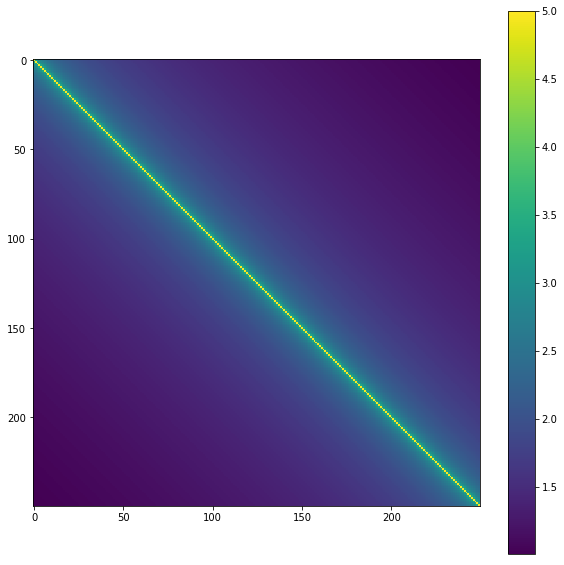

In [150]:
plt.imshow(np.log10(m))
plt.colorbar()

In [151]:
nboxes = 20

In [152]:
def get_box(nx, ny, mat, nboxes, n):
    """Return the content of a given box."""
    size = n // nboxes
    xrange = [nx * size, (1 + nx) * size]
    yrange = [ny * size, (1 + ny) * size]
    return mat[xrange[0]:xrange[1], yrange[0]:yrange[1]]

In [153]:
m = get_box(0, 0, mat, nboxes, n)

In [154]:
def plot_singular_values(nx, ny, mat, nboxes, n):
    """Plot singular values of a given box."""
    from scipy.linalg import svdvals
    s = svdvals(get_box(nx, ny, mat, nboxes, n))
    plt.semilogy(s)
    plt.xlabel('k')
    plt.ylabel('sigma_k')

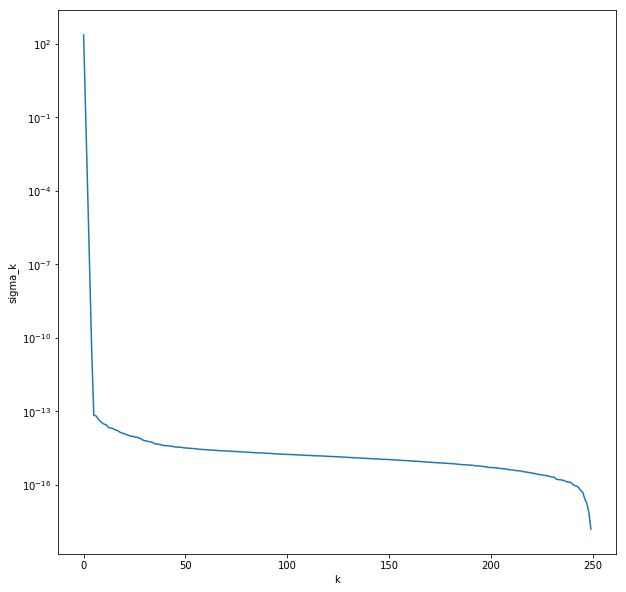

In [155]:
plot_singular_values(0, 1, mat, nboxes, n)

In [158]:
def plot_box_ranks(mat, nboxes, n, tol=1E-8):
    """Plot rank of the boxes."""
    from scipy.linalg import svdvals
    size = n // nboxes
    ranks = np.zeros((nboxes, nboxes), dtype='int32')
    for i in range(nboxes):
        for j in range(nboxes):
            m = get_box(i, j, mat, nboxes, n)
            s = svdvals(m)
            ranks[i, j] = np.sum(s > tol)
    plt.imshow(ranks, cmap='Accent')
    plt.colorbar()
            

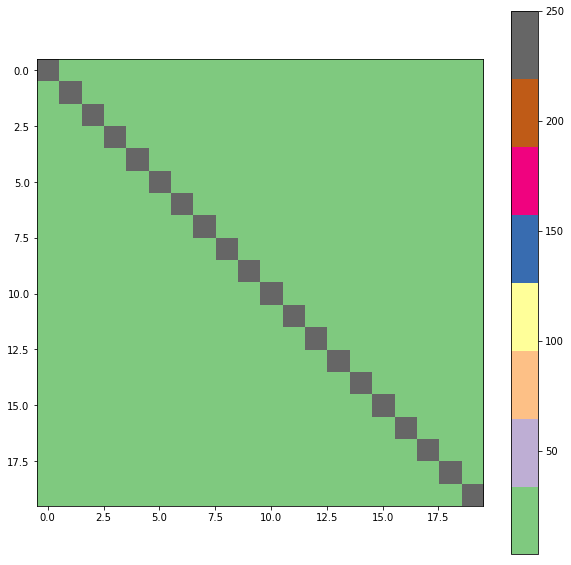

In [159]:
plot_box_ranks(mat, nboxes, n)